In [57]:
import urllib.request as urlli
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [58]:
ChannelId='1840267'
ReadApi='5IPVGMC3PSIVKXX8'
NUM=5000 

In [59]:
url=f'https://api.thingspeak.com/channels/{ChannelId}/feeds.json?api_key={ReadApi}&results={NUM}'
d=urlli.urlopen(url).read()
dat=json.loads(d)
data = dat['feeds']
print(data)

[{'created_at': '2022-09-08T18:42:43Z', 'entry_id': 4950, 'field1': '396', 'field2': '104', 'field3': '21', 'field4': '21', 'field5': '31.95888', 'field6': '66.12177'}, {'created_at': '2022-09-08T18:43:21Z', 'entry_id': 4951, 'field1': '396', 'field2': '104', 'field3': '20', 'field4': '20', 'field5': '31.95888', 'field6': '66.13702'}, {'created_at': '2022-09-08T18:43:41Z', 'entry_id': 4952, 'field1': '398', 'field2': '104', 'field3': '19', 'field4': '19', 'field5': '31.95888', 'field6': '66.08171'}, {'created_at': '2022-09-08T18:44:00Z', 'entry_id': 4953, 'field1': '396', 'field2': '105', 'field3': '21', 'field4': '21', 'field5': '31.96956', 'field6': '66.09315'}, {'created_at': '2022-09-08T18:44:38Z', 'entry_id': 4954, 'field1': '394', 'field2': '105', 'field3': '20', 'field4': '20', 'field5': '31.96689', 'field6': '66.08934'}, {'created_at': '2022-09-08T18:44:58Z', 'entry_id': 4955, 'field1': '394', 'field2': '104', 'field3': '21', 'field4': '21', 'field5': '31.96956', 'field6': '66.

In [60]:
temp=[]
hum=[]
co2=[]
voc=[]
pm2=[]
pm10=[]
timestamp=[]
for x in data:
    temp.append((float(x['field5'])))
    hum.append(float(x['field6']))
    co2.append(float(x['field1']))
    voc.append(float(x['field2']))
    pm2.append(float(x['field3']))
    pm10.append(float(x['field4']))
    if(x['field3']!=x['field4']):
        print("diff")
    t=x['created_at']
    ti=''
    ti+=t[0:4]+t[5:7]+t[8:10]+t[11:13]+t[14:16]+t[17:19]
    timestamp.append(int(ti))
#     timestamp.append(t)
    
print("Start Time(GMT): ", int(timestamp[0]))
print("End Time(GMT): ", int(timestamp[len(timestamp)-1]))
print("Data Size:", NUM)

Start Time(GMT):  20220908184243
End Time(GMT):  20220910065056
Data Size: 5000


# Temperature


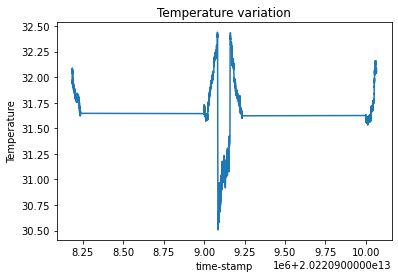

In [61]:
plt.plot(timestamp, temp)
  
plt.xlabel('time-stamp')
plt.ylabel('Temperature')
# giving a title to my graph
plt.title('Temperature variation')
plt.show()

In [71]:
min_temp = min(temp)
max_temp= max(temp)
print(f'We can see that temperature is always in between {min_temp}°C or {(min_temp*9)/5 +32}°F and {max_temp}°C or {(max_temp*9)/5 +32}°F')
print(f'The average value for the curve is {statistics.mean(temp)}')

We can see that temperature is always in between 30.50622°C or 86.91119599999999°F and 32.43954°C or 90.39117200000001°F
The average value for the curve is 31.688972634


# Humidity


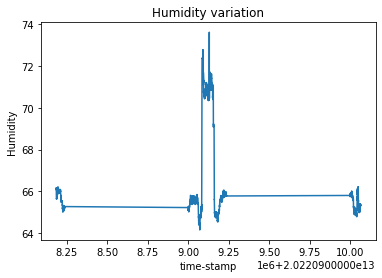

In [63]:
plt.plot(timestamp, hum)
  
plt.xlabel('time-stamp')
plt.ylabel('Humidity')
# giving a title to my graph
plt.title('Humidity variation')
plt.show()

In [72]:
min_hum = min(hum)
max_hum= max(hum)
print(f'We can see that humidity is always in between {min_hum}%  and {max_hum}%')
print(f'The average value for the curve is {statistics.mean(hum)}')

We can see that humidity is always in between 64.15526%  and 73.61967%
The average value for the curve is 66.55997527


# CO2


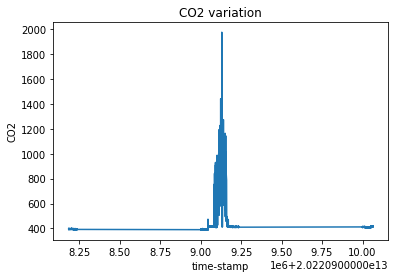

In [65]:
plt.plot(timestamp, co2)
  
plt.xlabel('time-stamp')
plt.ylabel('CO2')
# giving a title to my graph
plt.title('CO2 variation')
plt.show()

In [73]:
min_co2 = min(co2)
max_co2= max(co2)
print(f'We can see that CO2 level is always in between {min_co2}ppm  and {max_co2}ppm')
print(f'The average value for the curve is {statistics.mean(co2)}')

We can see that CO2 level is always in between 388.0ppm  and 1976.0ppm
The average value for the curve is 481.2592


# VOC


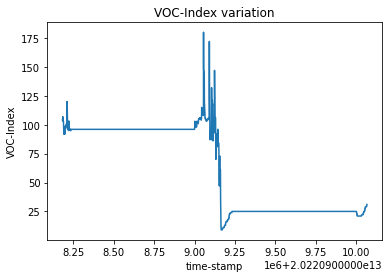

In [67]:
plt.plot(timestamp, voc)
  
plt.xlabel('time-stamp')
plt.ylabel('VOC-Index')
# giving a title to my graph
plt.title('VOC-Index variation')
plt.show()

In [74]:
min_voc = min(voc)
max_voc= max(voc)
print(f'We can see that VOC-Index is always in between {min_voc}  and {max_voc}')
print(f'The average value for the curve is {statistics.mean(voc)}')

We can see that VOC-Index is always in between 9.0  and 180.0
The average value for the curve is 68.1236


# PM2.5 and PM10

Text(0.5, 1.0, 'PM-10')

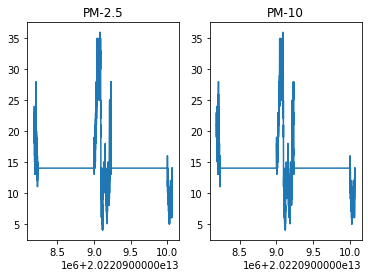

In [69]:
figure, axis = plt.subplots(1, 2)
  
axis[0].plot(timestamp, pm2)
axis[0].set_title("PM-2.5")
  
axis[1].plot(timestamp, pm10)
axis[1].set_title("PM-10")

In [78]:
print("It is quite evident that the the two curves for pm2 and pm10 are exactly idntical")
min_pm = min(pm2)
max_pm= max(pm2)
print(f'We can see that Pm(both pm2 and pm10) level is always in between {min_pm}mg/m3  and {max_pm}mg/m3')
print(f'The average value for the curve is {statistics.mean(pm2)}')

It is quite evident that the the two curves for pm2 and pm10 are exactly idntical
We can see that Pm(both pm2 and pm10) level is always in between 4.0mg/m3  and 36.0mg/m3
The average value for the curve is 15.6606


# Some Analysis


Text(0.5, 1.0, 'PM-10')

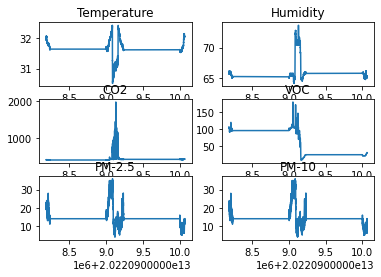

In [77]:
figure, axis = plt.subplots(3, 2)

axis[0,0].plot(timestamp, temp)
axis[0,0].set_title("Temperature")
  
axis[0,1].plot(timestamp, hum)
axis[0,1].set_title("Humidity")

axis[1,0].plot(timestamp, co2)
axis[1,0].set_title("CO2")
  
axis[1,1].plot(timestamp, voc)
axis[1,1].set_title("VOC")

axis[2,0].plot(timestamp, pm2)
axis[2,0].set_title("PM-2.5")
  
axis[2,1].plot(timestamp, pm10)
axis[2,1].set_title("PM-10")

### Some observations:
> On 9th of september there was a heavy rainfall. It is also reflected in our sensors.
>- The temperature dropped by 2-2.5°C.
>- Humidity increased by 7-8% on 9th.
> - The CO2 level is increased rapidly by 1500 ppm, which corressponds with the wikipidea text:  
> <i>Given that water vapor is rarely more than 3% of the atmosphere and only a fraction of that can turn into rain, and the PPM is slightly lower in rain-water than air, that's a pretty slow way of pulling CO2 from the atmosphere. what's more, as rain water evaporates, that CO2 is returned to the atmosphere.</i>
>
